### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import plotly.graph_objects as go


### Position Plot

Using LineCollection, we found a way to represent the position of the robot following the increasing moving steps. 

Yellow is more recents, blue is more startings.

ALL in functions to be called.

In [2]:
def position_plot_2D(df, name = "___"):
    # Prepare the segments for the colored line
    points = np.array([df['mantis_x'], df['mantis_y']]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # Use cur_step to color the line
    norm = plt.Normalize(df['cur_step'].min(), df['cur_step'].max())
    lc = LineCollection(segments, cmap='viridis', norm=norm)
    lc.set_array(df['cur_step'])
    lc.set_linewidth(2)

    # Plot
    fig, ax = plt.subplots(figsize=(8, 6))
    line = ax.add_collection(lc)
    fig.colorbar(line, ax=ax, label='Step')

    origin_x, origin_y = df.iloc[0]['mantis_x'], df.iloc[0]['mantis_y']
    end_x, end_y = df.iloc[-1]['mantis_x'], df.iloc[-1]['mantis_y']

    # Plot origin
    ax.scatter(origin_x, origin_y, color='red', marker='x', s=100, label='Origin')
    ax.text(origin_x, origin_y, '  origin', color='red', fontsize=10, verticalalignment='bottom')

    # Plot end
    ax.scatter(end_x, end_y, color='green', marker='x', s=100, label='End')
    ax.text(end_x, end_y, '  end', color='green', fontsize=10, verticalalignment='bottom')

    ax.set_xlim(df['mantis_x'].min()-0.5, df['mantis_x'].max()+1)
    #ax.set_xlim(-1, 5)
    ax.set_ylim(df['mantis_y'].min()-1, df['mantis_y'].max()+1)
    ax.set_xlabel('Mantis X')
    ax.set_ylabel('Mantis Y')
    ax.set_title(f'2D Trajectory, Colored by Step - {name}')
    plt.grid(True)
    plt.tight_layout()
    plt.show()


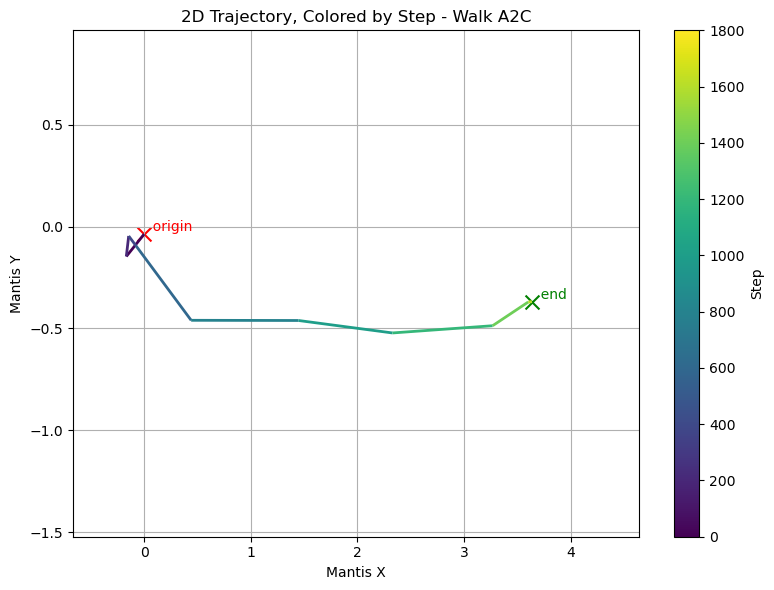

In [3]:
df = pd.read_csv("./walk half/walk_A2C_RL_Transfer.csv")

position_plot_2D(df.iloc[:10], "Walk A2C")

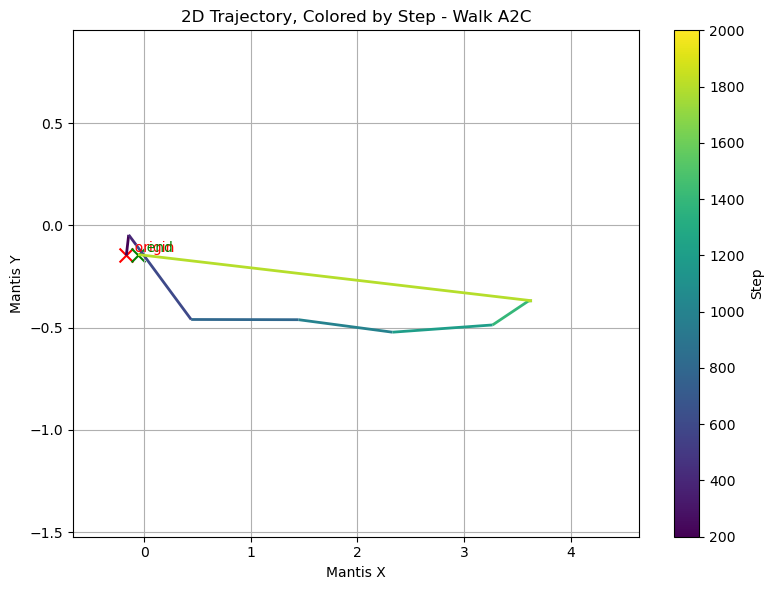

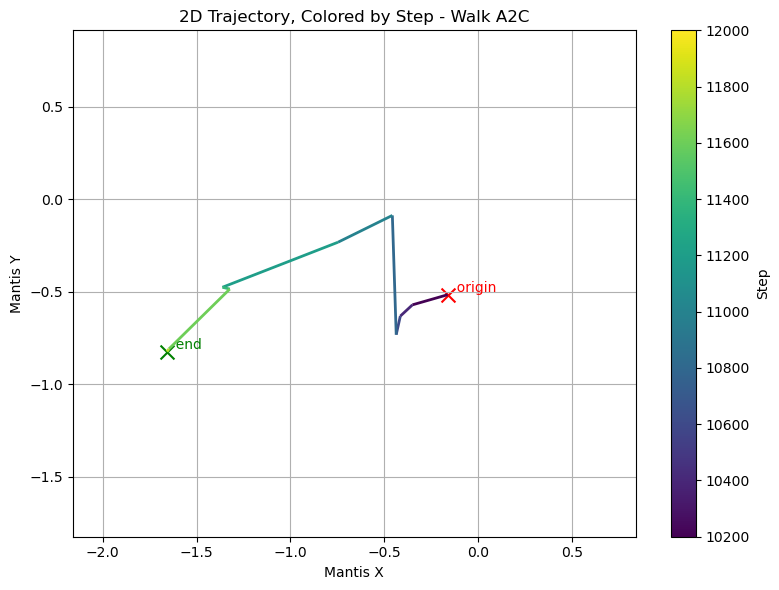

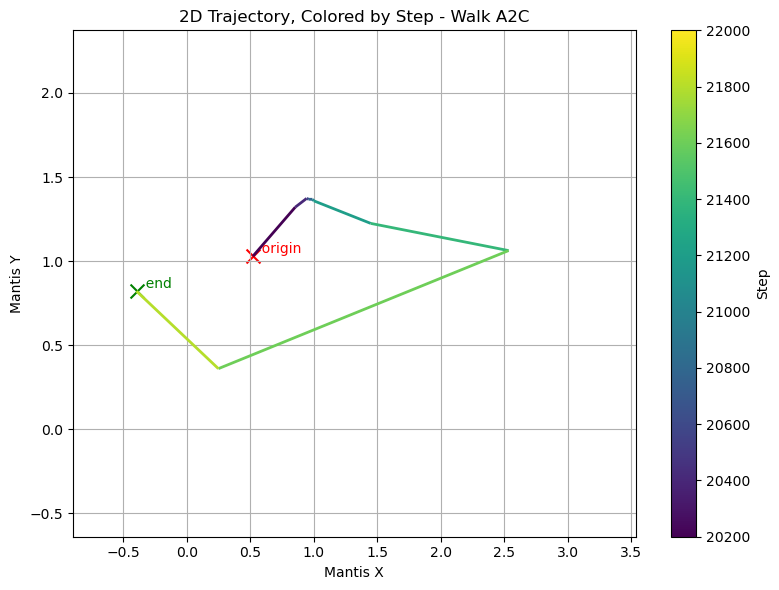

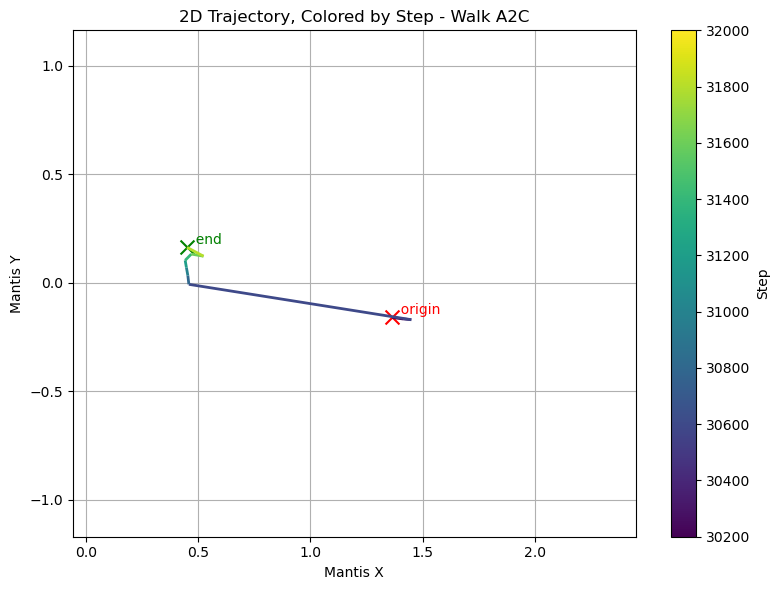

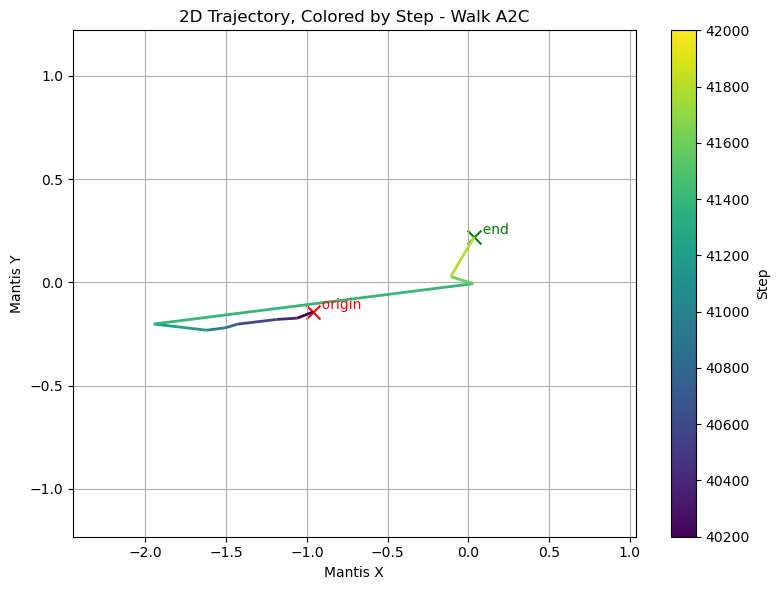

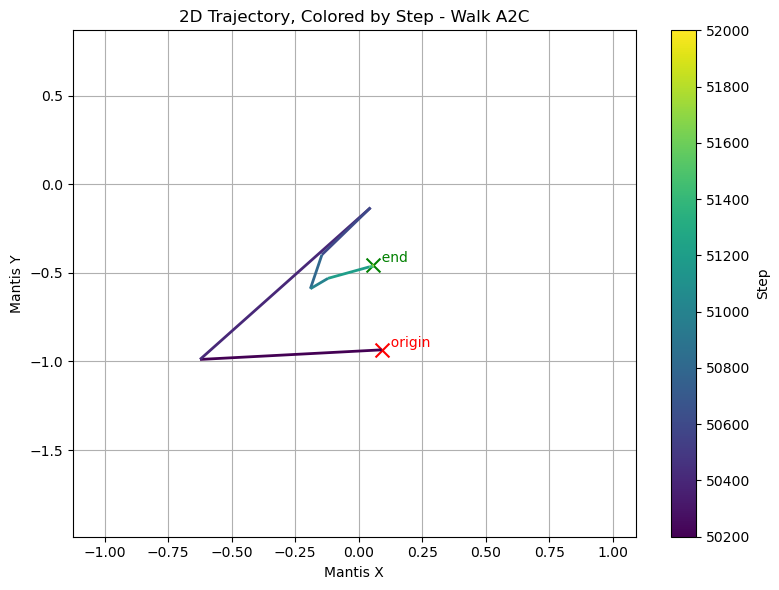

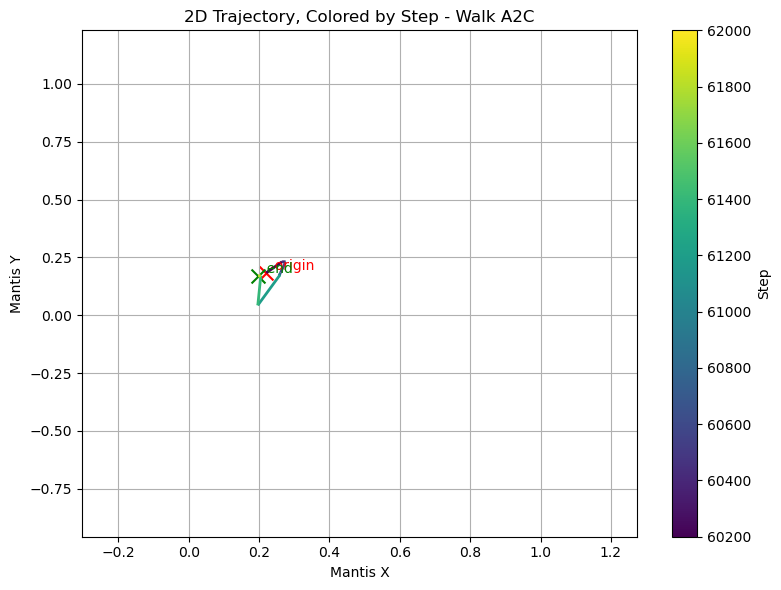

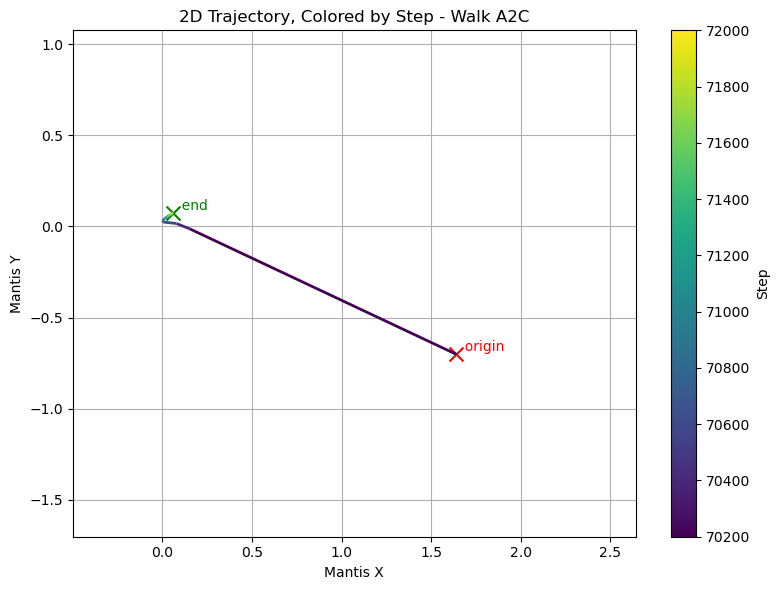

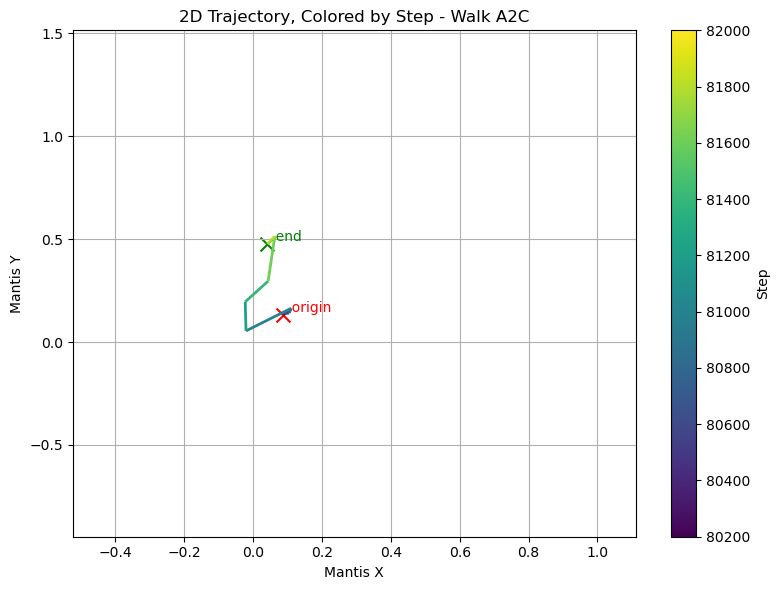

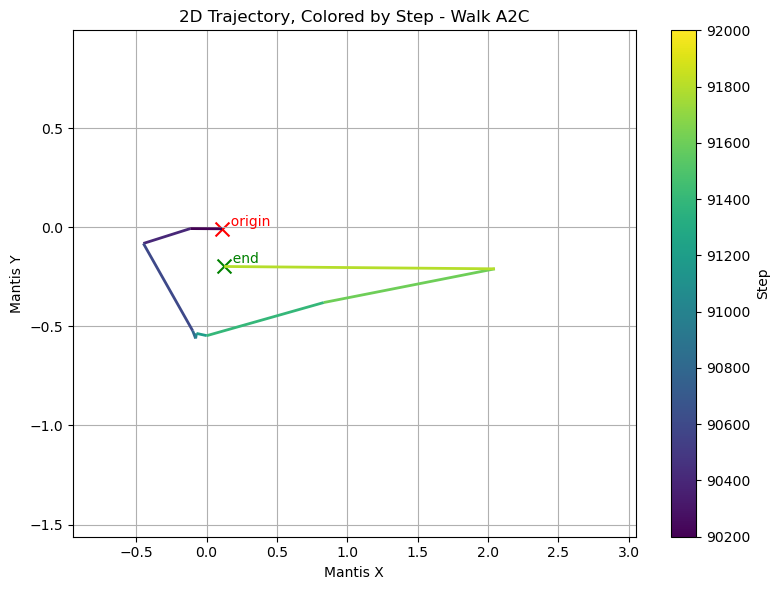

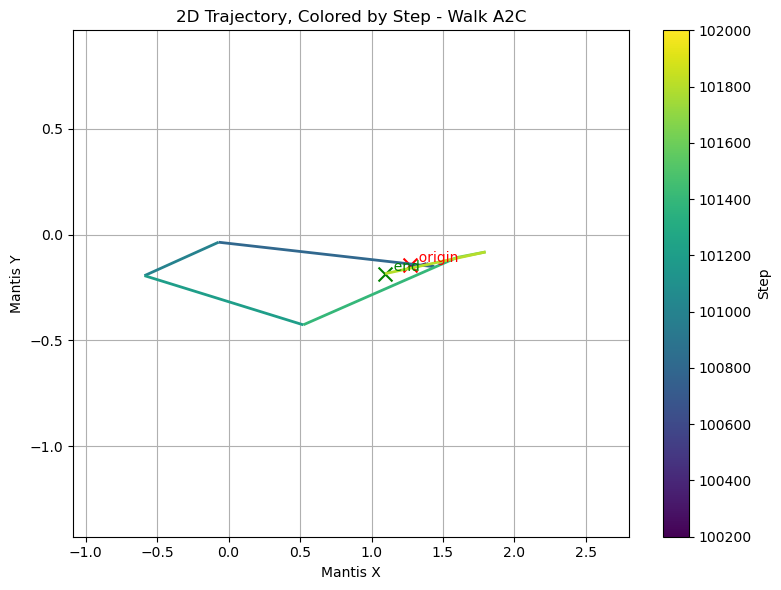

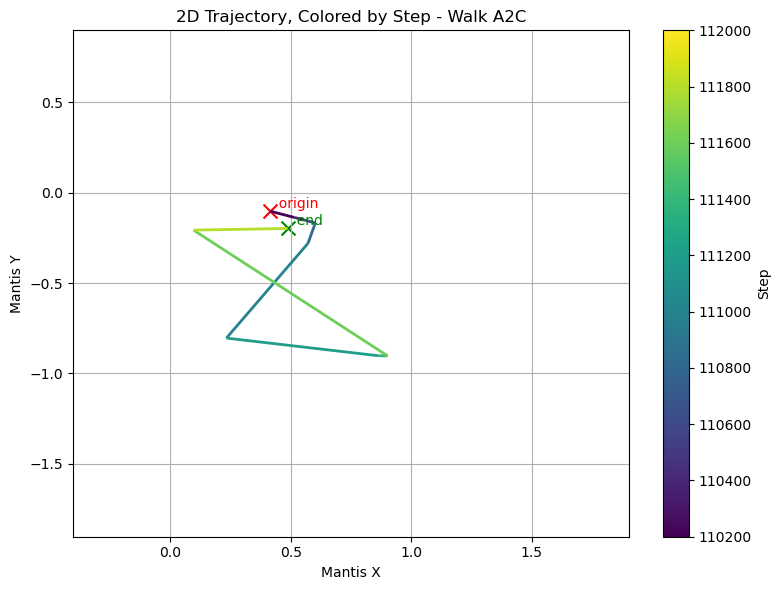

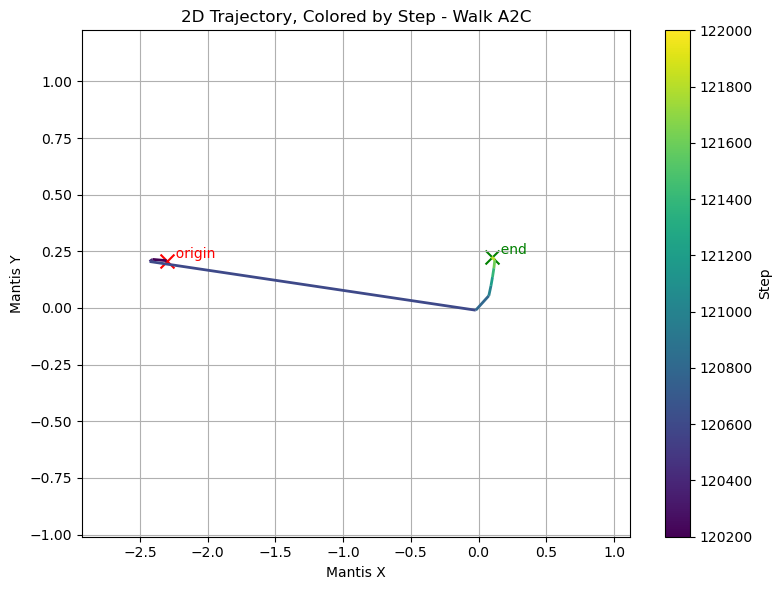

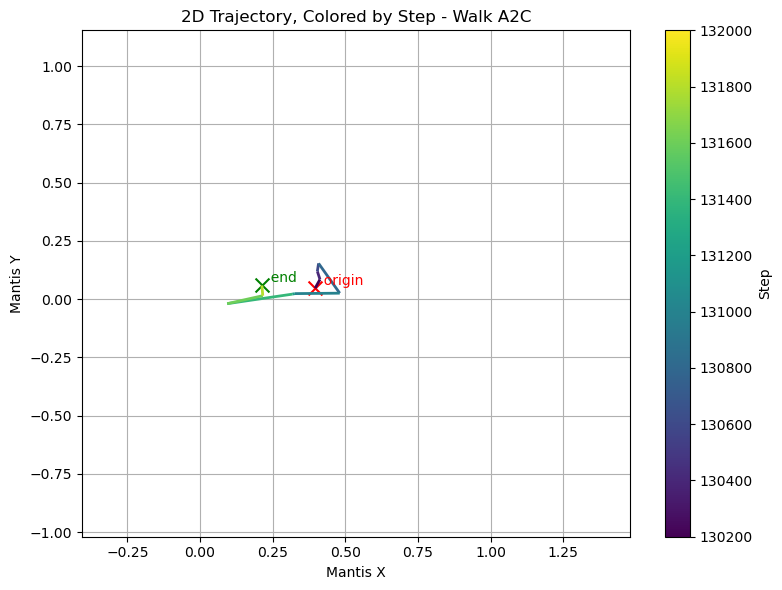

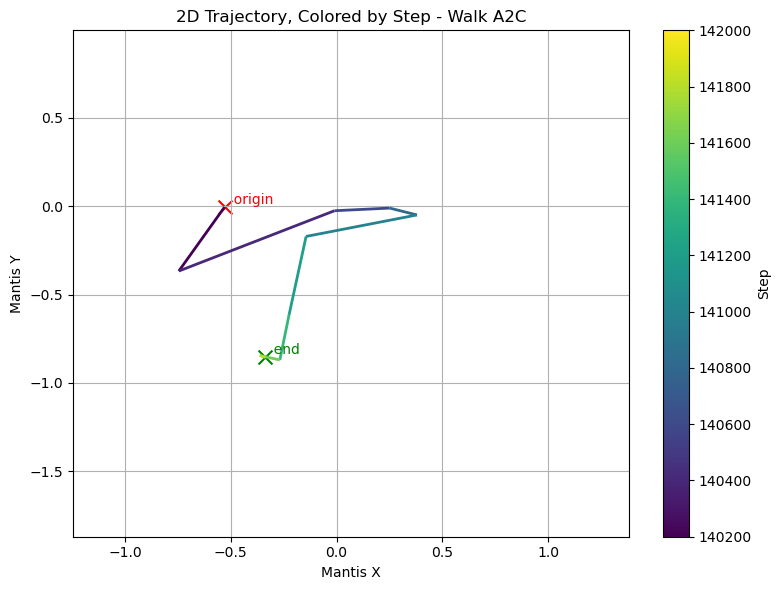

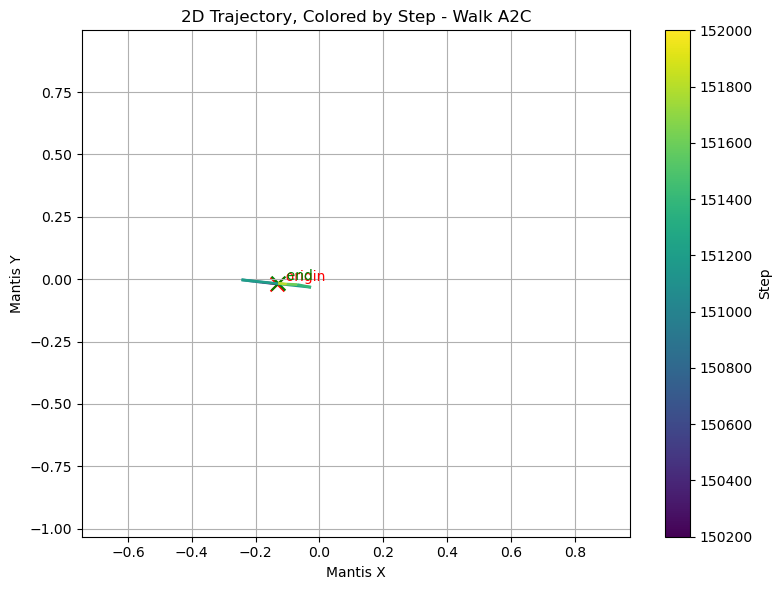

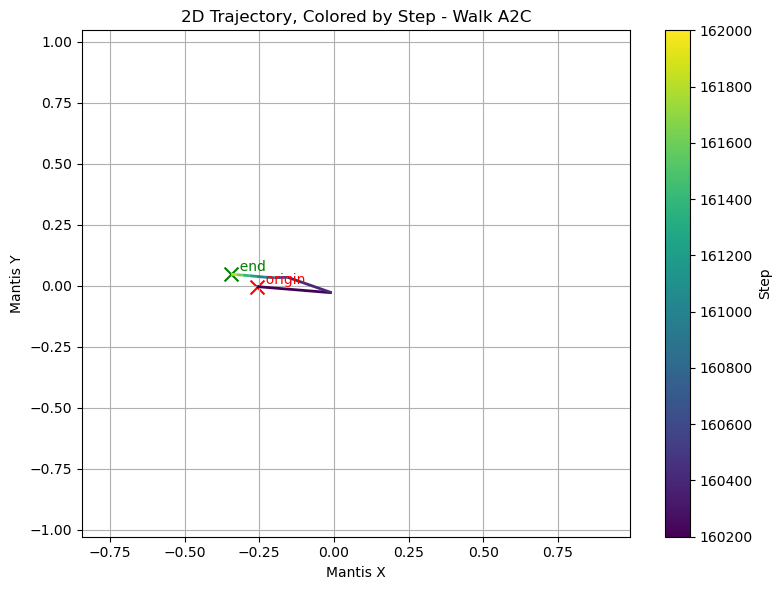

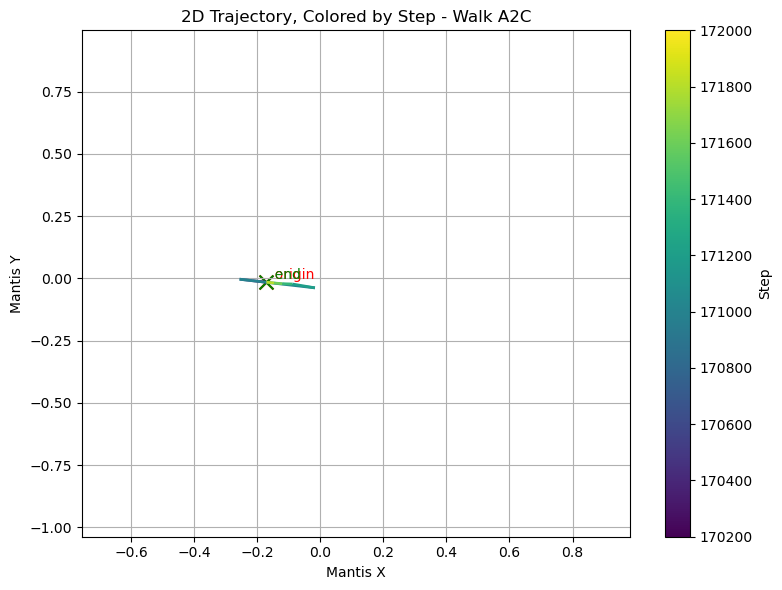

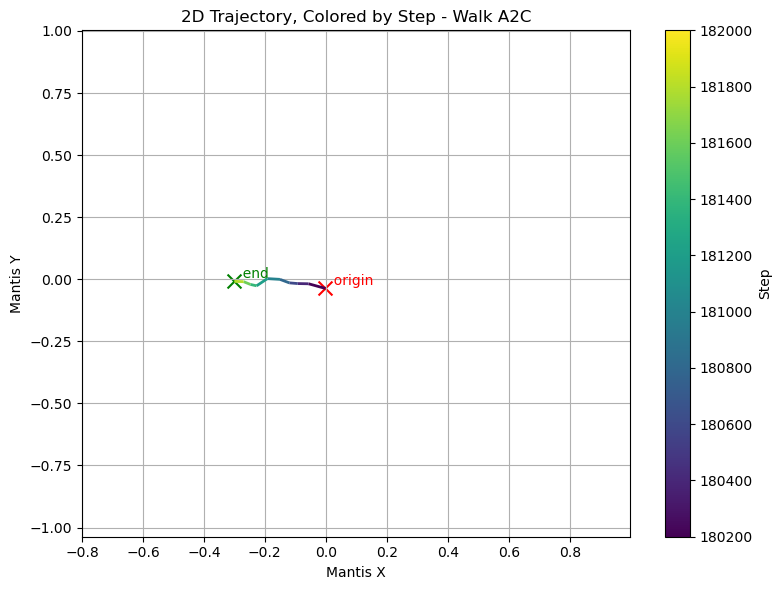

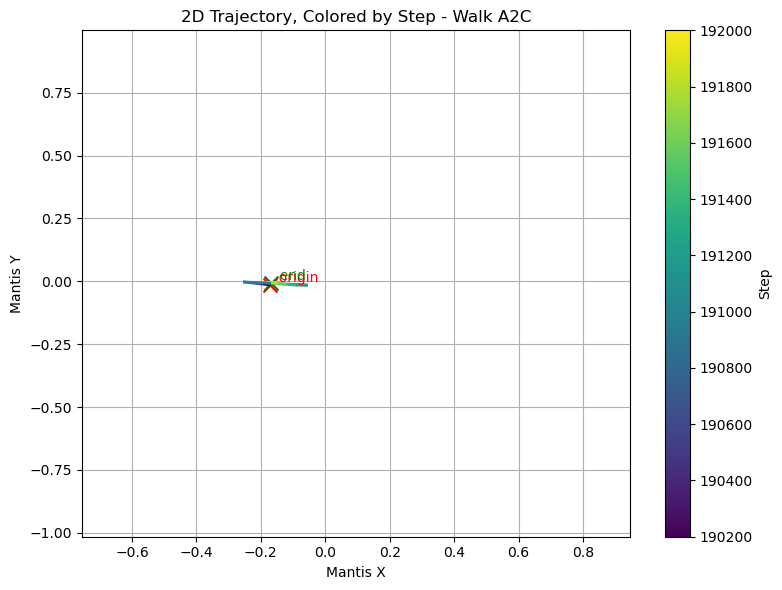

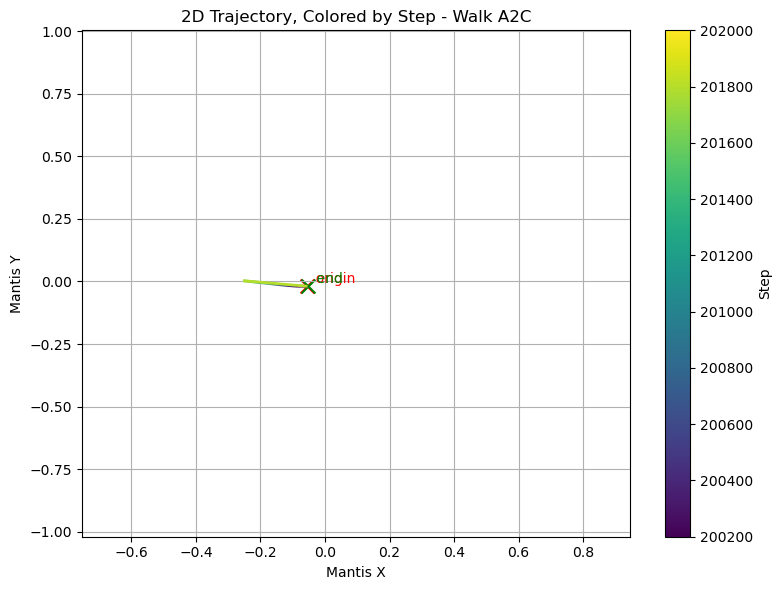

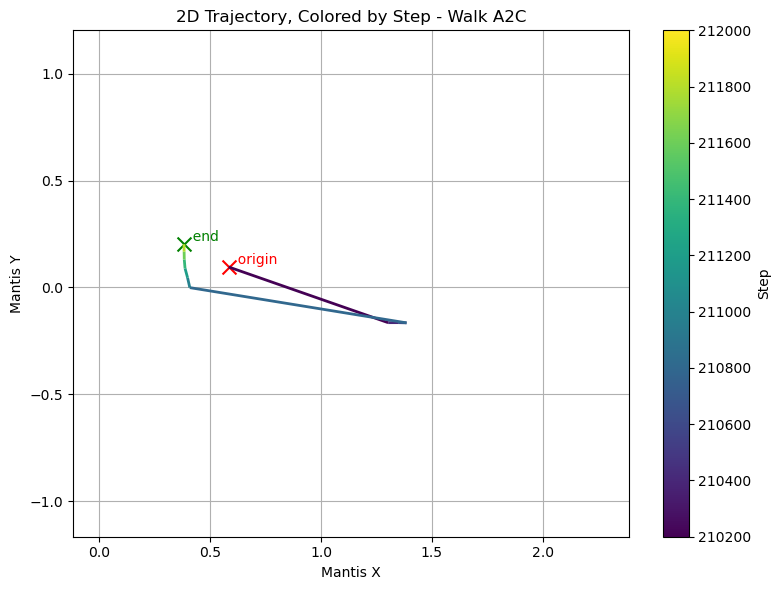

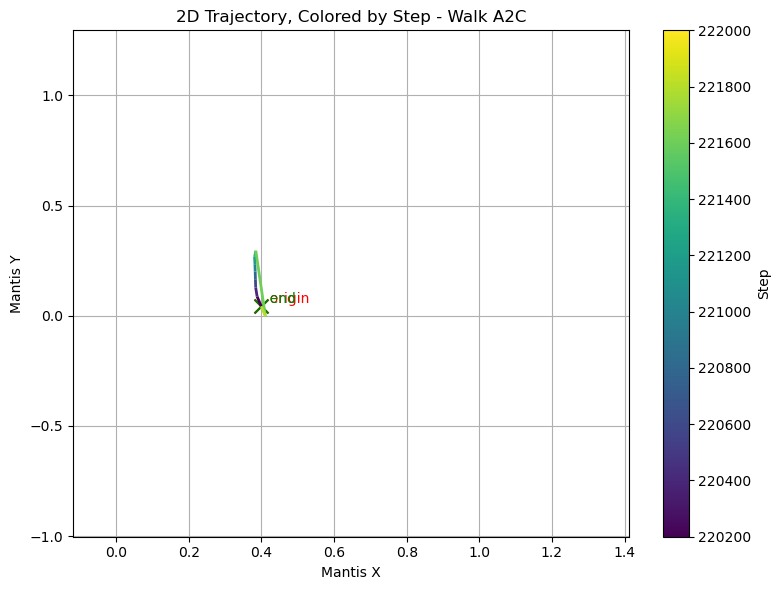

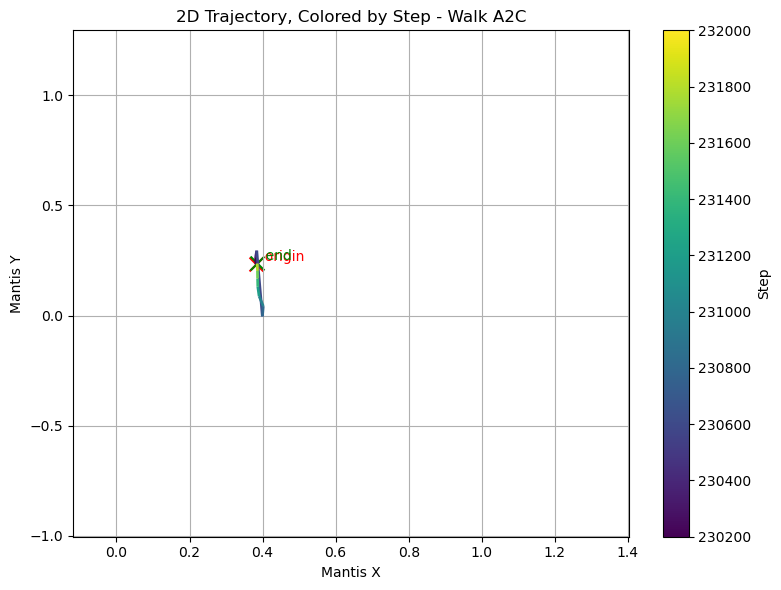

In [45]:
df = pd.read_csv("./walk half/walk_A2C_RL_Transfer.csv")

for i in range(1,1200,50):
    position_plot_2D(df.iloc[i:i+10], "Walk A2C")

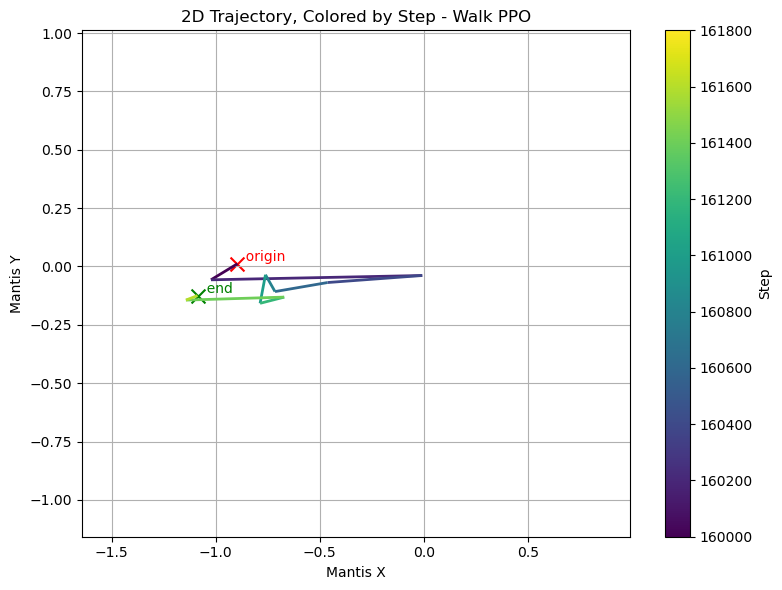

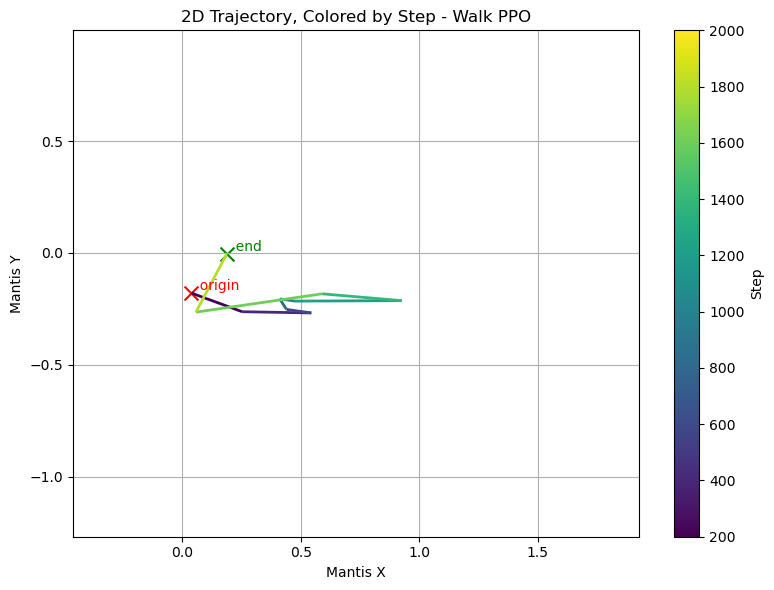

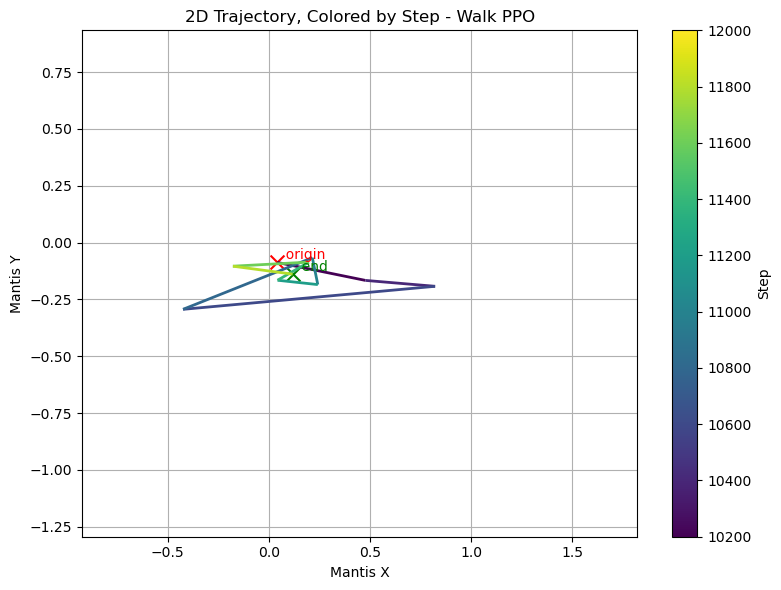

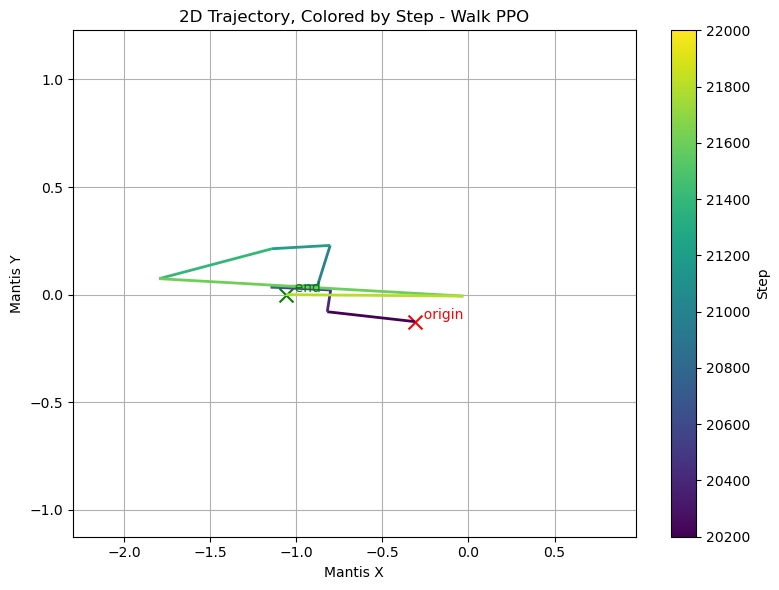

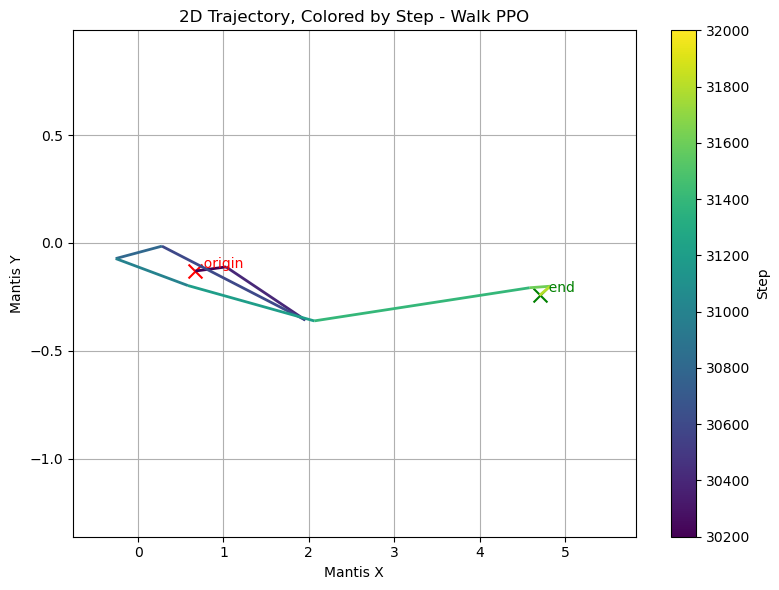

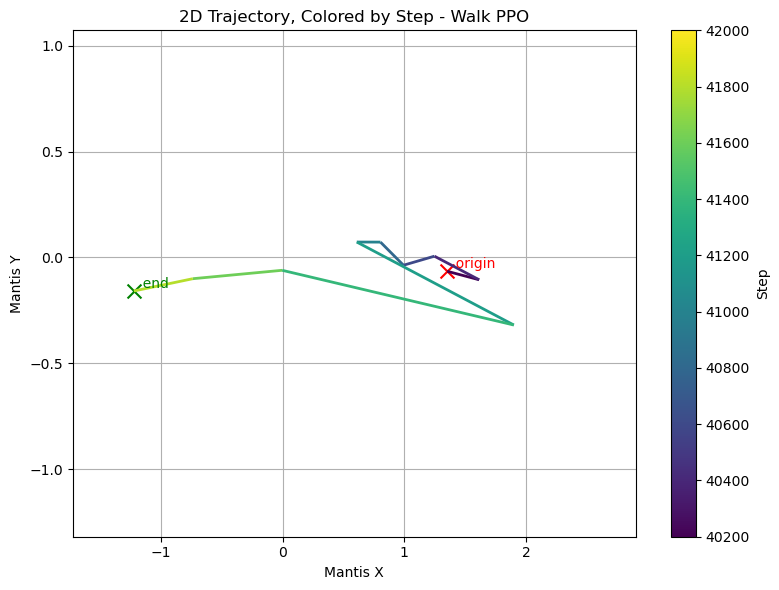

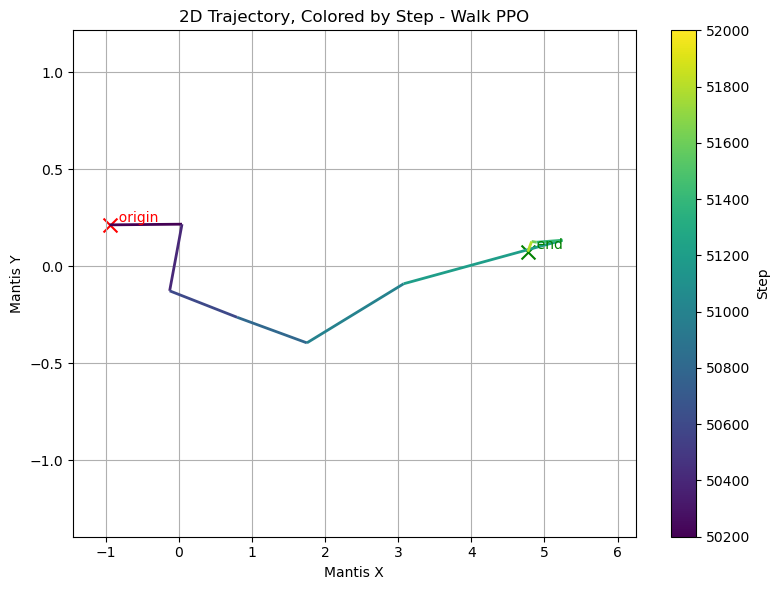

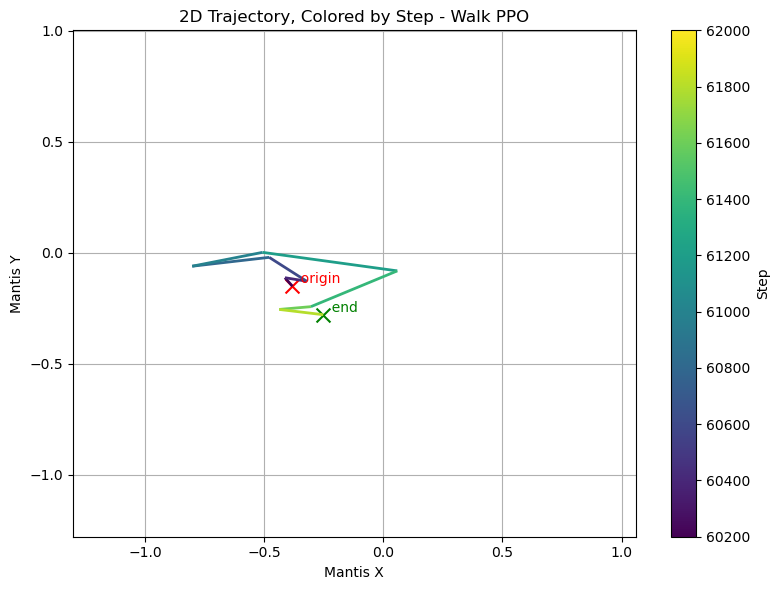

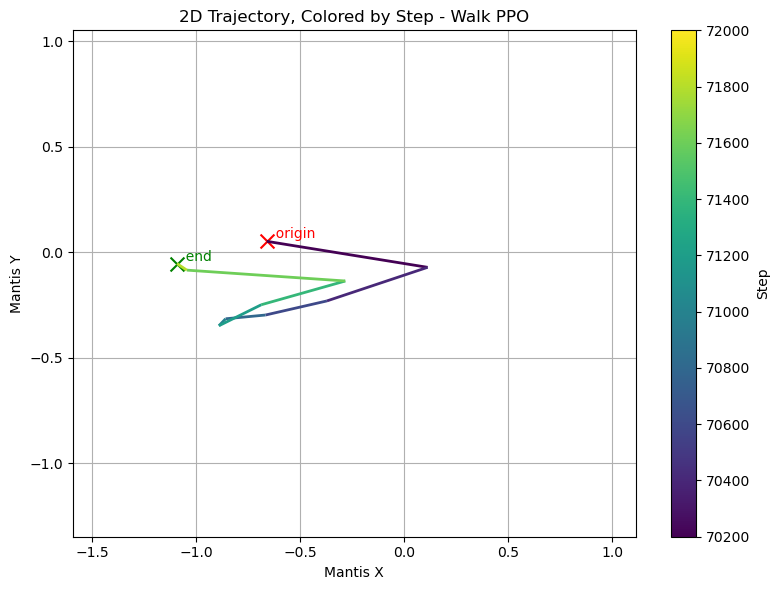

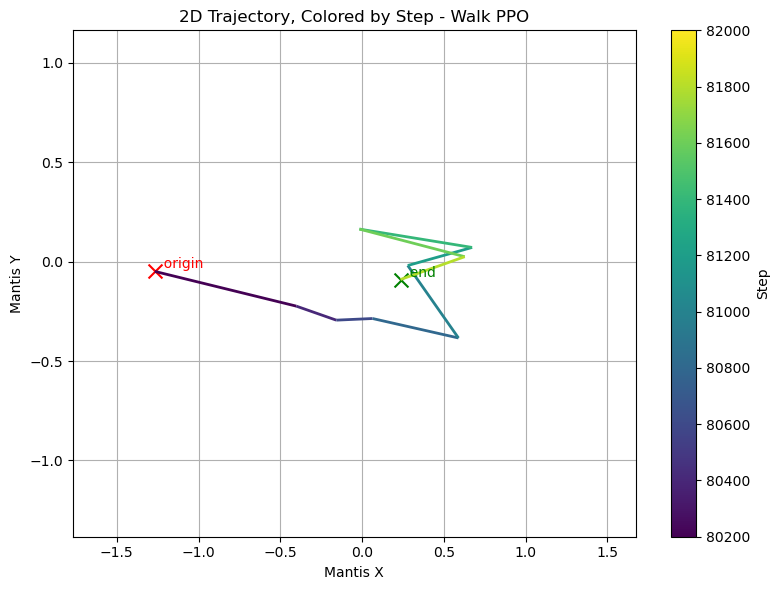

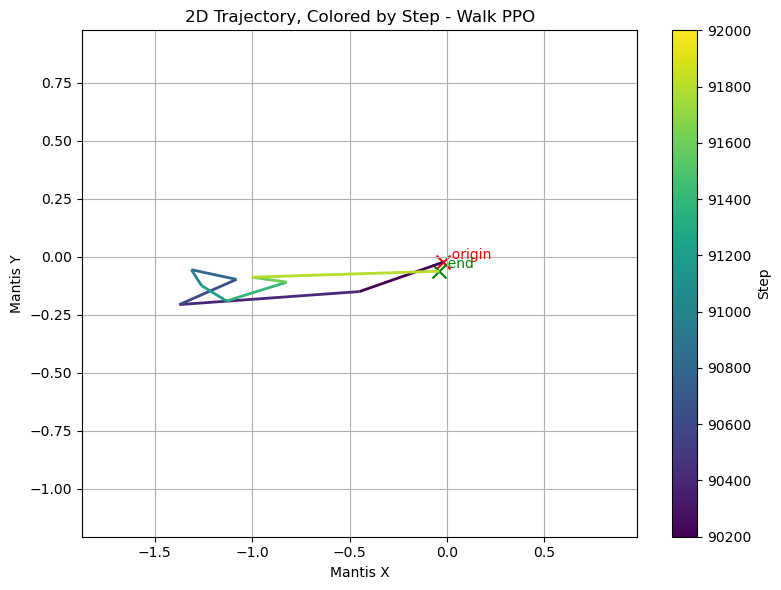

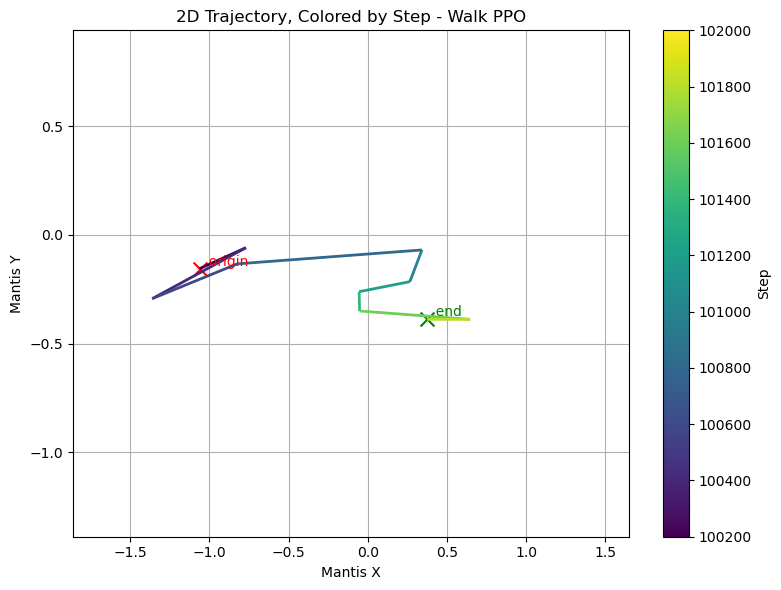

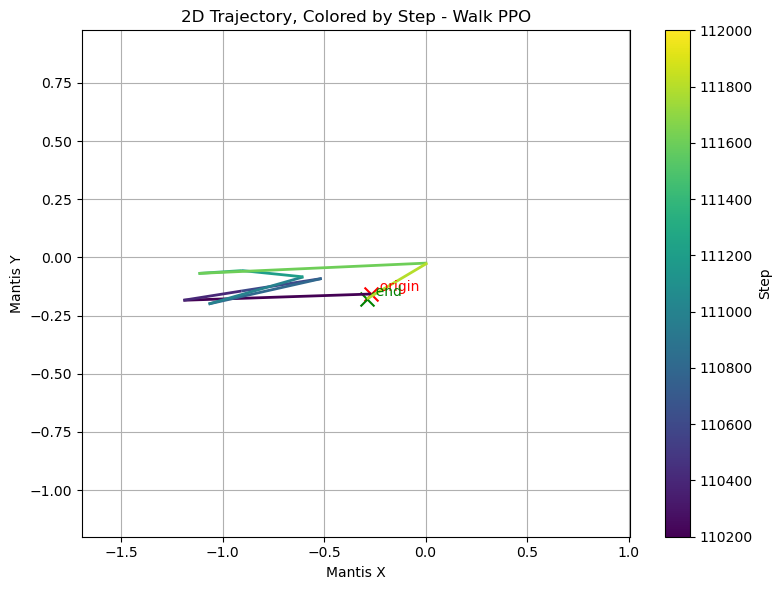

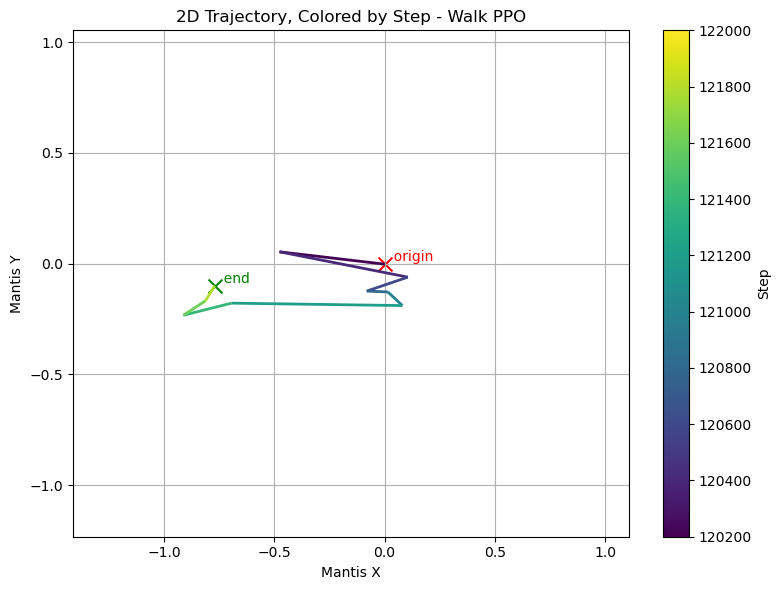

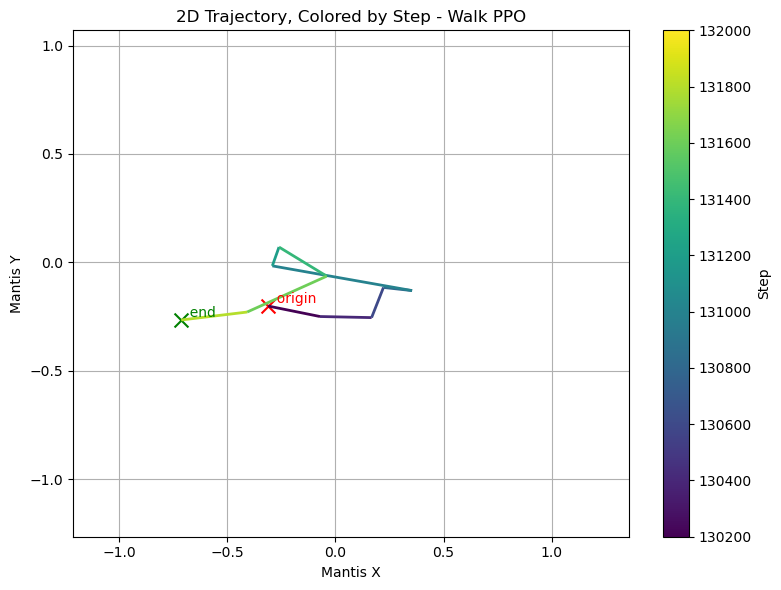

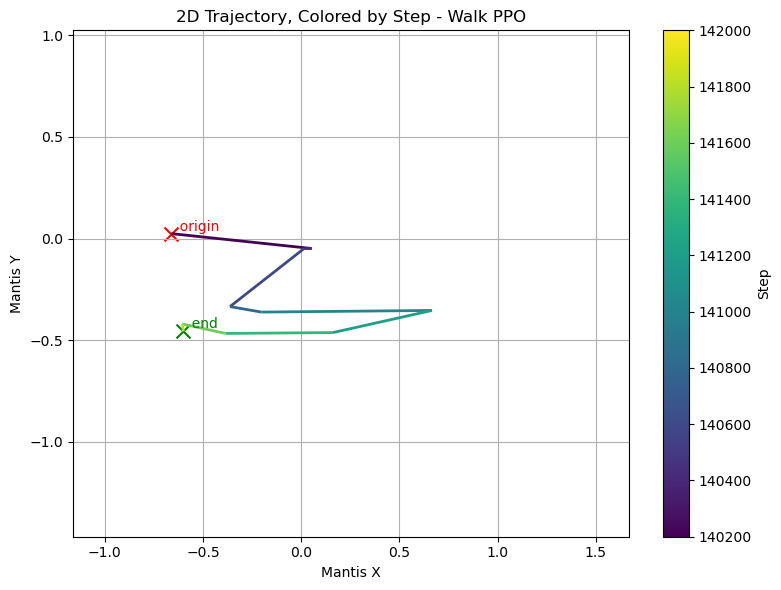

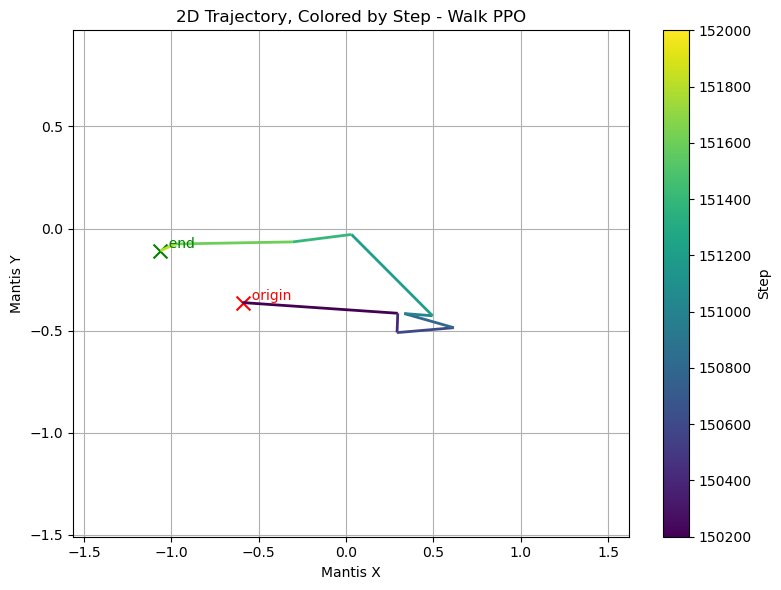

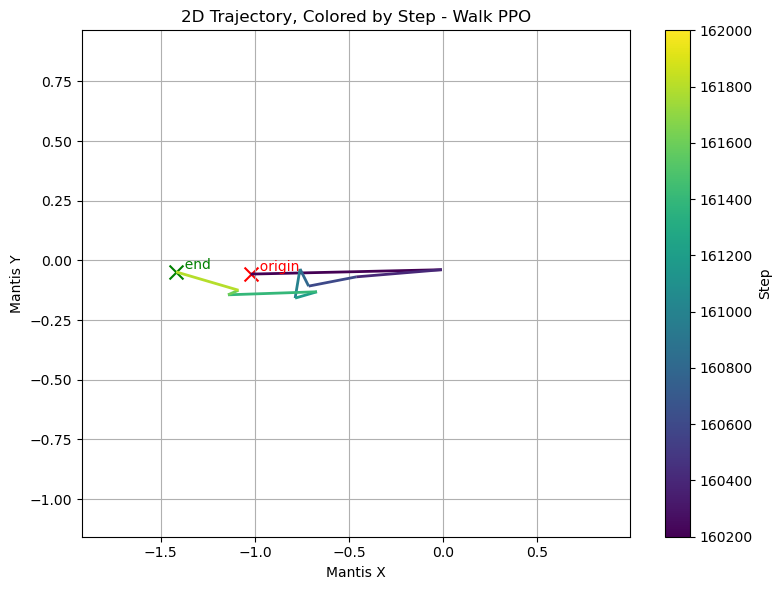

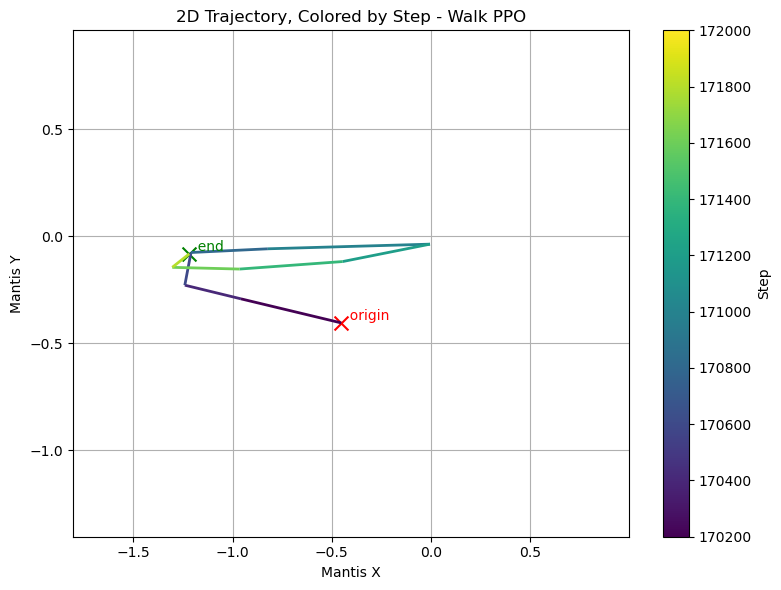

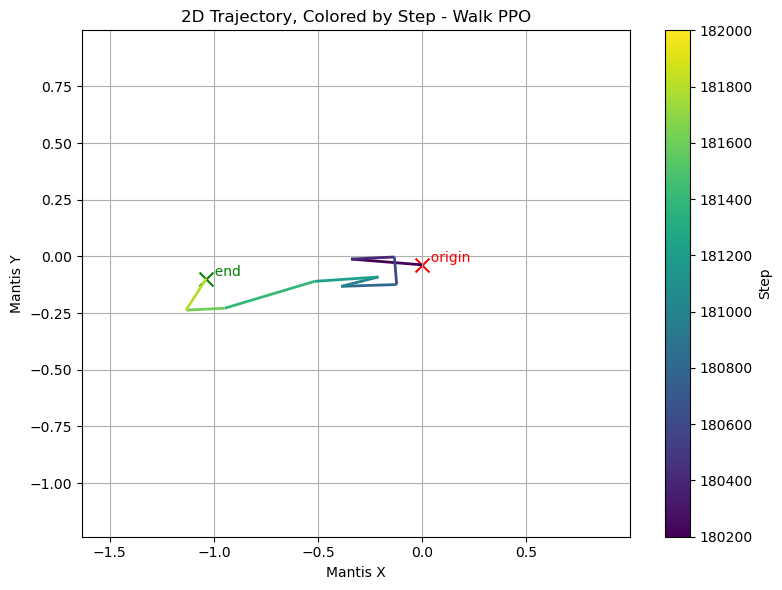

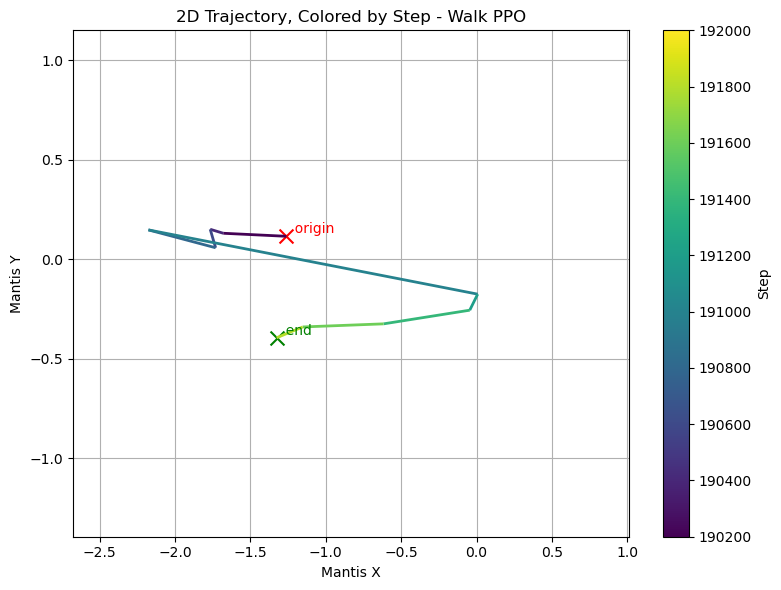

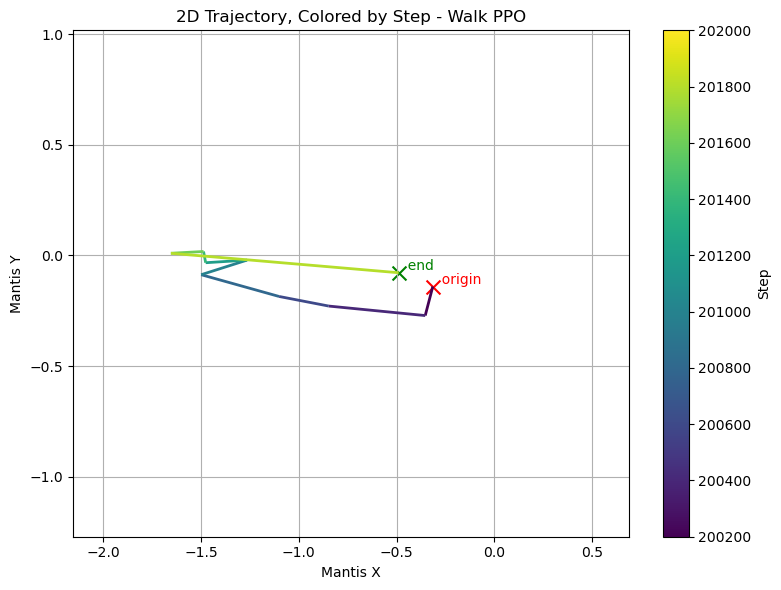

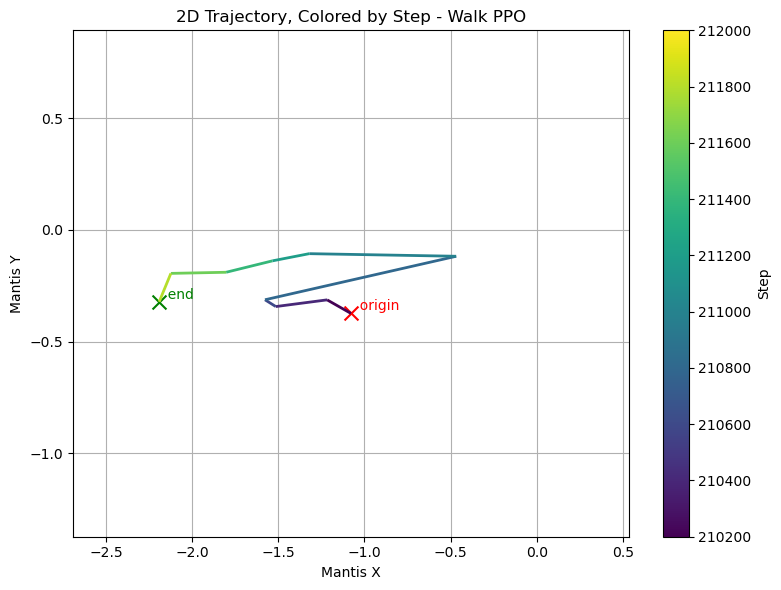

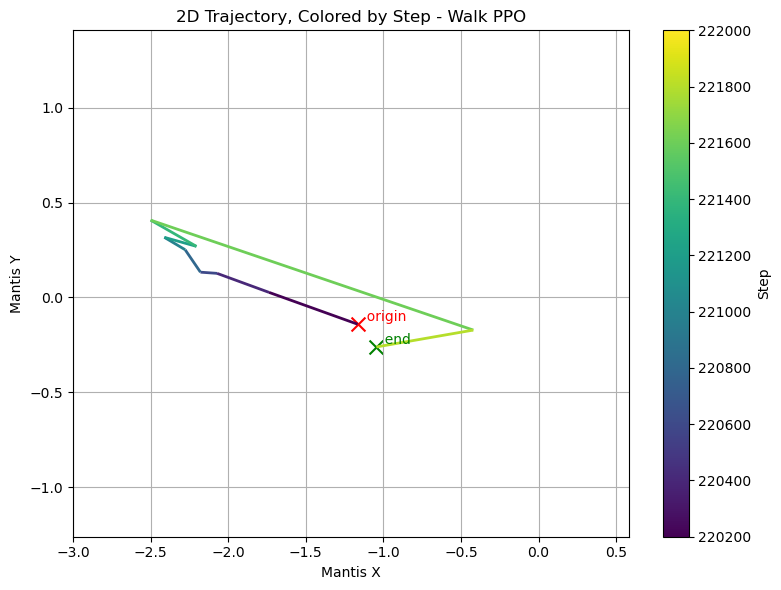

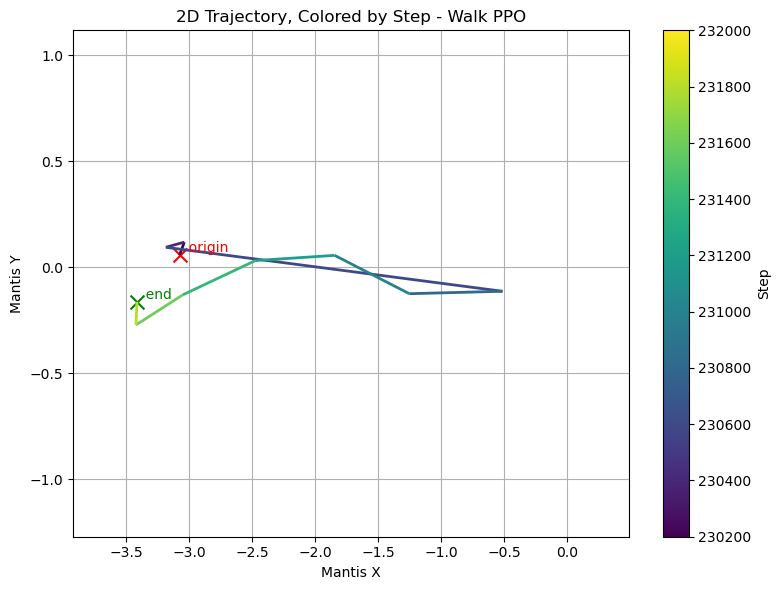

In [44]:
df = pd.read_csv("./walk half/walk_PPO_RL_Transfer.csv")
position_plot_2D(df.iloc[800:810], "Walk PPO")

for i in range(1,1200,50):
    position_plot_2D(df.iloc[i:i+10], "Walk PPO")



---


### Position Plot 3D

WAY more confusing, probably not important tbh. Mas meti interativo e ficou fofo ig.

In [5]:
def position_plot_3D(df):
    # uses plotly (pip install plotly)
    fig = go.Figure(data=go.Scatter3d(
        x=df['mantis_x'],
        y=df['mantis_y'],
        z=df['mantis_z'],
        mode='lines',
        line=dict(
            color=df['cur_step'],       # Color by time
            colorscale='Viridis',       # Color gradient
            width=5
        )
    ))

    fig.update_layout(
        title='3D Trajectory of Robot (Colored by Step)',
        scene=dict(
            xaxis_title='X Position',
            yaxis_title='Y Position',
            zaxis_title='Z Position'
        ),
        margin=dict(l=0, r=0, t=50, b=0)
    )

    fig.show()


In [75]:
#position_plot_3D(df)

---
### Line charts

In [52]:
def plot_total_reward(df, name = "___"):
    plt.figure(figsize=(10, 5))
    #plt.plot(df['cur_step'], df['total_reward'], color='black', linewidth=2, label='Total Reward') 

    # Smooth com rolling average, senao fica estranho, tem a linha de cima para ver sem smoothing
    df['total_reward_smooth'] = df['total_reward'].rolling(window=100).mean()
    plt.plot(df['cur_step'], df['total_reward_smooth'], color='blue', linestyle='-', label='Smoothed')

    plt.xlabel('Time Step')
    plt.ylabel('Total Reward')
    plt.title(f'Total Reward Over Time - {name}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

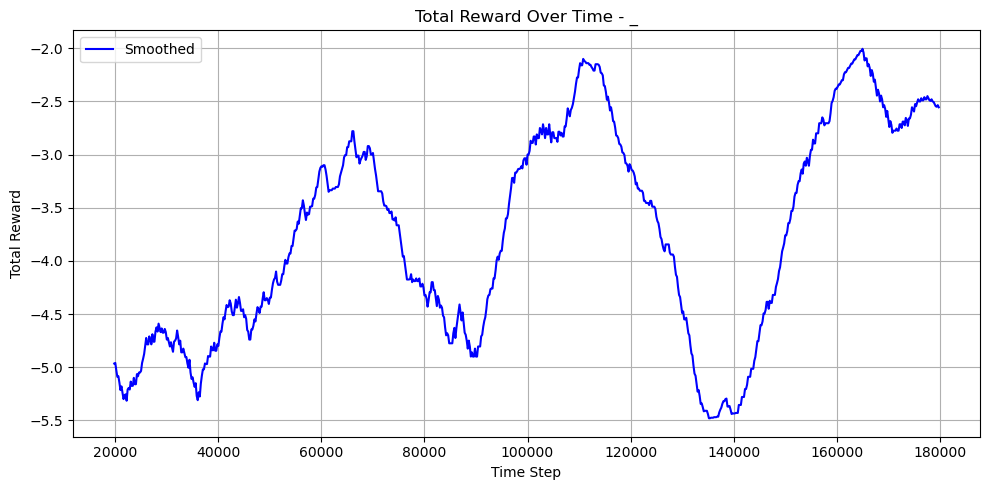

In [25]:
plot_total_reward(df)

### Compare different reward lines

In [53]:
def plot_multiple_total_rewards(dfs, labels=None, window=100, name = "___"):
    plt.figure(figsize=(12, 6))

    for i, df in enumerate(dfs):
        label = labels[i] if labels and i < len(labels) else f'Run {i+1}'

        # Sort by cur_step (in case it’s unordered)
        df = df.sort_values('cur_step')

        # Apply rolling average smoothing
        smooth = df['total_reward'].rolling(window=window, min_periods=1).mean()

        # Plot
        plt.plot(df['cur_step'], smooth, label=label, linewidth=2)

    plt.xlabel('Time Step')
    plt.ylabel('Smoothed Total Reward')
    plt.title(f'Total Reward Over Time ({name})')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [77]:
df1 = pd.read_csv("stand_up_A2C_RL_0.csv")
df2 = pd.read_csv("stand_up_PPO_RL_0.csv")
df3 = pd.read_csv("stand_up_DDPG_RL_0.csv")

#### 

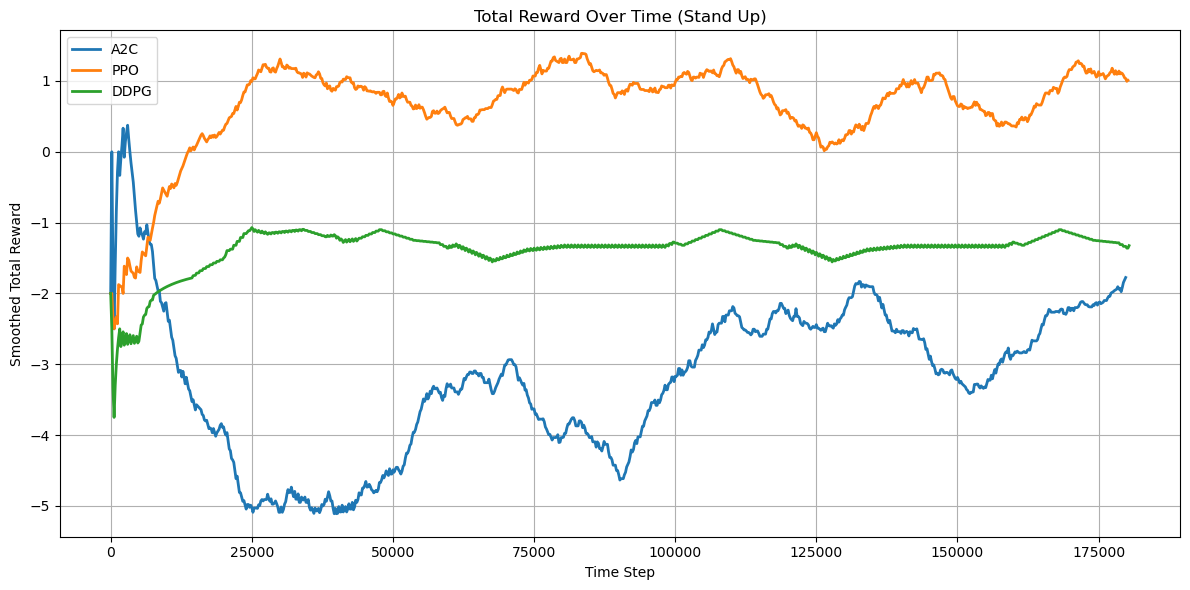

In [78]:
plot_multiple_total_rewards(dfs=[df1, df2,df3], labels=["A2C", "PPO", "DDPG"], name = "Stand Up")

---
### Walk Complete with Transfer

In [81]:
df1 = pd.read_csv("./walk complete/walk_A2C_RL_Transfer.csv")
df2 = pd.read_csv("./walk complete/walk_PPO_RL_Transfer.csv")

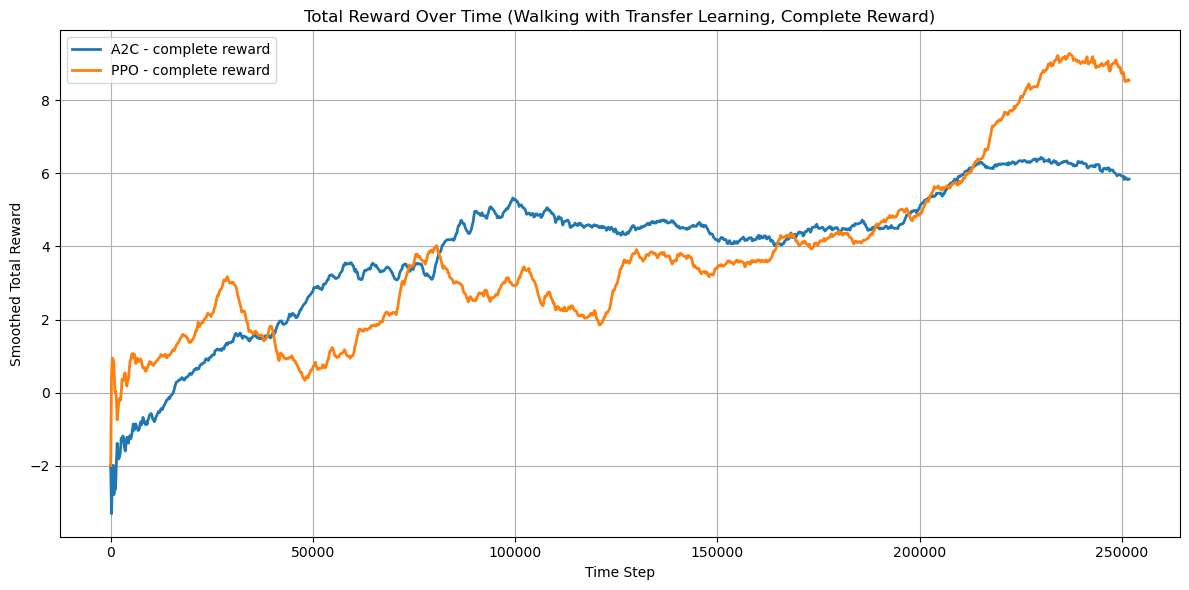

In [83]:
plot_multiple_total_rewards(dfs=[df1, df2], labels=["A2C - complete reward", "PPO - complete reward"], name = "Walking with Transfer Learning, Complete Reward")

---
### Halved Reward


In [84]:
df1 = pd.read_csv("./walk half/walk_A2C_RL_Transfer.csv")
df2 = pd.read_csv("./walk half/walk_PPO_IRL_Raw.csv")
df3 = pd.read_csv("./walk half/walk_PPO_IRL_Transfer.csv")
df4 = pd.read_csv("./walk half/walk_PPO_RL_Transfer.csv")

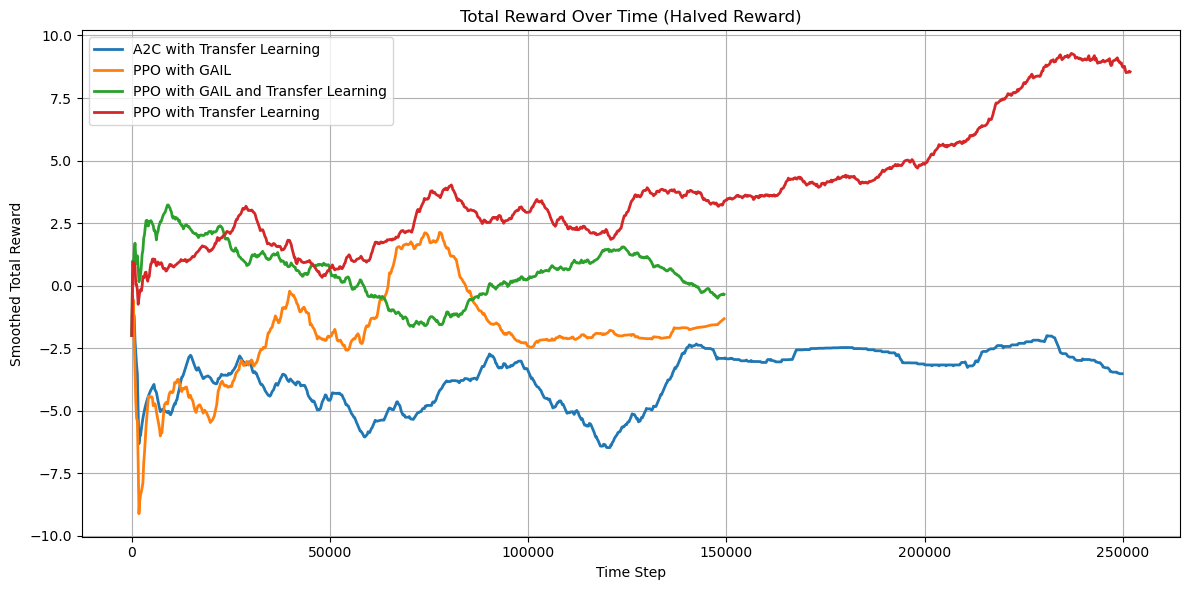

In [85]:
plot_multiple_total_rewards(dfs=[df1, df2, df3, df4], labels=["A2C with Transfer Learning",
                                                               "PPO with GAIL",
                                                               "PPO with GAIL and Transfer Learning",
                                                               "PPO with Transfer Learning"], name = "Halved Reward")

### Different reward plots

In [7]:
def plot_reward_components(df, stacked=False, smoothing_window=100, name = "___"):
    components = ['stability_reward', 'height_reward', 'walk_reward']
    labels = ['Stability', 'Height', 'Walk']
    colors = ['#1f77b4', '#2ca02c', '#ff7f0e']  # blue, green, orange

    plt.figure(figsize=(12, 6))

    if stacked:
        # Smooth each component
        smoothed = [df[c].rolling(window=smoothing_window, min_periods=1).mean() for c in components]
        plt.stackplot(df['cur_step'], smoothed, labels=labels, colors=colors, alpha=0.8)
        plt.title('Stacked Reward Components Over Time (Smoothed)')
    else:
        for comp, label, color in zip(components, labels, colors):
            smooth = df[comp].rolling(window=smoothing_window, min_periods=1).mean()
            plt.plot(df['cur_step'], smooth, label=label, linewidth=2, color=color)
        plt.title(f'Reward Components Over Time {name}')

    plt.xlabel('Time Step')
    plt.ylabel('Reward Value')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


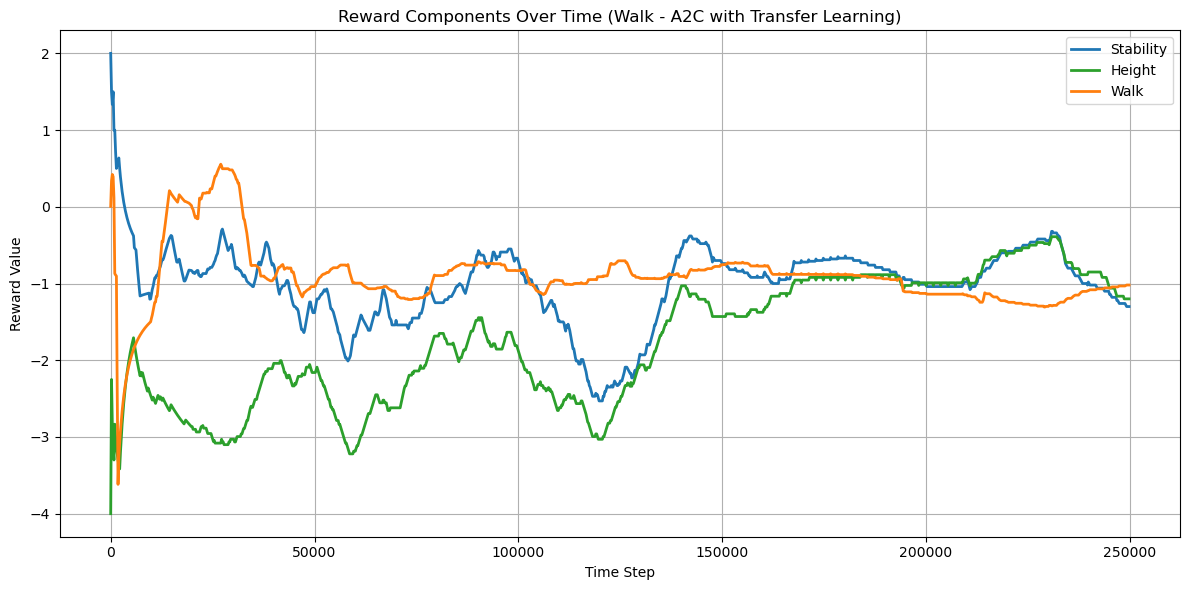

In [ ]:
#df1 = pd.read_csv("./walk half/walk_A2C_RL_Transfer.csv")
plot_reward_components(df1, name = "(Walk - A2C with Transfer Learning)")

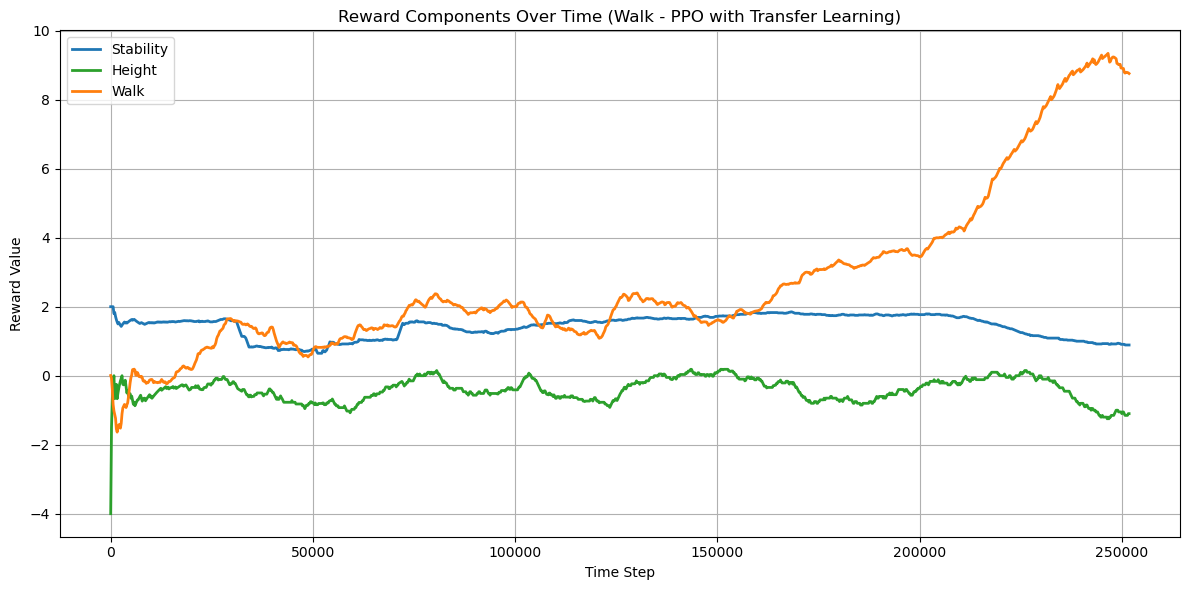

In [12]:
df4 = pd.read_csv("./walk half/walk_PPO_RL_Transfer.csv")
plot_reward_components(df4, name = "(Walk - PPO with Transfer Learning)")